## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Reading the dataset

In [2]:
data = pd.read_csv('covid19.csv', index_col = 0)

In [3]:
data.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Sno,,,,,,
1,30/01/20,Kerala,1,0,0,0
2,31/01/20,Kerala,1,0,0,0
3,01/02/20,Kerala,2,0,0,0
4,02/02/20,Kerala,3,0,0,0
5,03/02/20,Kerala,3,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 270
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      270 non-null    object
 1   State/UnionTerritory      270 non-null    object
 2   ConfirmedIndianNational   270 non-null    int64 
 3   ConfirmedForeignNational  270 non-null    int64 
 4   Cured                     270 non-null    int64 
 5   Deaths                    270 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 14.8+ KB


## Performing groupby operation using Date attribute

In [5]:
df = data.groupby(['Date'], sort = False).sum()
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


## Finding the total number of cases

In [6]:
df['TotalCases'] = df.sum(axis = 1).astype('int')
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,TotalCases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3


In [7]:
df.tail()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,TotalCases
Date,,,,,
17/03/20,113,24,14,3,154
18/03/20,126,25,14,3,168
19/03/20,148,25,20,4,197
20/03/20,191,32,23,4,250
21/03/20,244,39,23,4,310


## Plotting a graph for Date against Total Cases

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

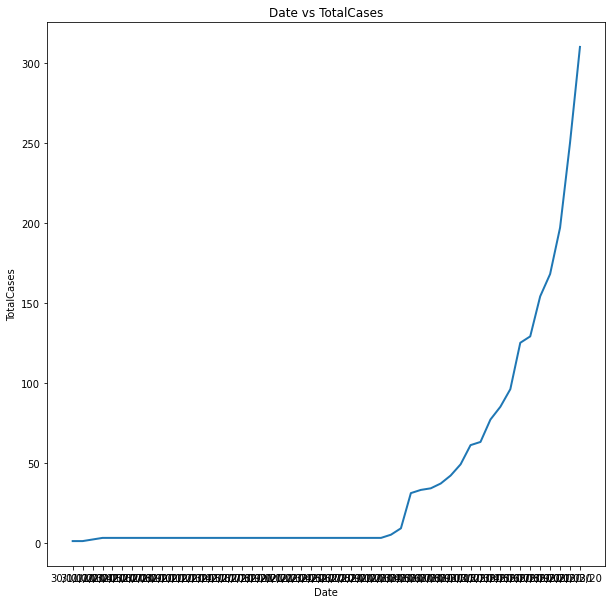

In [9]:
plt.figure(figsize = (10,10))

plt.plot(df['TotalCases'], linewidth = 2, markersize = 12)
plt.title('Date vs TotalCases')
plt.xlabel('Date')
plt.ylabel('TotalCases')
plt.show()

### Finding the total number of cases on 04/03/2020

In [10]:
df.loc['04/03/20','TotalCases']

31

## Dropping columns 

In [11]:
df.drop('ConfirmedIndianNational', axis = 1, inplace = True)
df.drop( 'ConfirmedForeignNational', axis = 1, inplace = True)
df.drop('Cured', axis = 1, inplace = True)
df.drop('Deaths', axis = 1, inplace = True)

In [12]:
df.head()

,TotalCases
Date,
30/01/20,1
31/01/20,1
01/02/20,2
02/02/20,3
03/02/20,3


In [13]:
df.tail()

,TotalCases
Date,
17/03/20,154
18/03/20,168
19/03/20,197
20/03/20,250
21/03/20,310


## Calcluating the Rate of Interest on each day

In [14]:
a = df['TotalCases']
rate = []
for i in range(0,len(a)-1):
    r = (a[i+1] - a[i]) / a[i]
    rate.append(r)
rate = pd.DataFrame(rate)
rate.rename(columns = {0:'Rate'}, inplace = True) 
rate

,Rate
0,0.000000
1,1.000000
2,0.500000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


## Computing the Average Rate of Increase

In [15]:
rate_req = rate[34:]
rate_req
rate_req.mean(axis = 0)

Rate    0.148148
dtype: float64